**HW4 Machine Learning**  
Jeffrey Patrick Phys 427  
January 30, 2020  

Boosted Decision Trees produce outputs based on given inputs which get split by conditional nodes throughout the tree. The order of the nodes is dependent on the amount of entropy loss, or information gain, and they have categorical conditions such as $x>=y$. After it gives us an output, the boosted tree will run again basing the new outputs on the weight of the previous outputs. 

Neural Networks function as a set of algorithims for pruning a dataset down to the result we want. The data gets inputted into the neural network at which point it is multiplied by weights that correlate to the result. After being weighted, the data gets summed together and is then sent into the neural network's activation function. 

In [74]:
pip install uproot                       

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import pandas as pd
import uproot
import seaborn as sns
from collections import Counter

In [5]:
file_1 = uproot.open("df_1.root")
file_2 = uproot.open("df_2.root")
file_3 = uproot.open("df_3.root")
file_4 = uproot.open("df_4.root")
file_5 = uproot.open("df_5.root")
file_6 = uproot.open("df_6.root")

tree1 = file_1["pandas_tree218"]
tree2 = file_2["pandas_tree51358"]
tree3 = file_3["pandas_tree53278"]
tree4 = file_4["pandas_tree52558"]
tree5 = file_5["pandas_tree53038"]
tree6 = file_6["pandas_tree54718"]

tree1 = tree1.pandas.df()
tree2 = tree2.pandas.df()
tree3 = tree3.pandas.df()
tree4 = tree4.pandas.df()
tree5 = tree5.pandas.df()
tree6 = tree6.pandas.df()

trees = [tree1, tree2, tree3, tree4, tree5, tree6]
all_trees = pd.concat(trees)
all_trees

C:\Users\Jeffrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,EH_CBL0,EH_CBL1,EH_CVL2,EH_EBL0,EH_EBL1,EH_EBL2,EH_EL0,EH_EL1,EH_EL2,EH_EL3,...,JetPt,Leta,Lphi,Lpt,Lpz,Lx,Ly,Lz,RunNumber,nLLPs_Near_Jets
entry,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.019344,0.000731,0.00000,0.000807,0.031896,0.844471,0.001827,...,50.151355,1.779190,0.095954,NaN,NaN,1851.684326,178.223892,5354.035156,284500.0,1
1,0.001846,0.007566,-0.000409,0.006951,0.000300,0.00013,0.000000,0.000000,0.000000,0.000000,...,45.315016,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,284500.0,0
2,0.000000,0.000000,0.000000,0.004981,-0.000061,0.00000,0.208731,0.094806,0.004111,0.000000,...,163.244844,1.705462,2.767689,NaN,NaN,609.158691,239.010056,1741.357788,284500.0,1
3,0.053559,0.016177,-0.000283,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,147.121187,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,284500.0,0
4,0.171568,0.171965,0.010581,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,54.661199,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,284500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695822,0.128465,0.782973,0.010746,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,216.514703,0.171292,2.608571,145729.990106,25084.673828,2221.168945,1310.453613,443.914246,310000.0,1
1695823,0.196844,0.105239,0.005006,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,100.025234,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,310000.0,0
1695824,0.000000,0.000000,0.000000,0.104669,0.001416,0.00000,-0.000205,0.000000,0.000000,0.000000,...,88.622664,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,310000.0,0


Training a BDT with values of IsLLP equal to True. I created a dataframe showing all columns with IsLLP equal to true and then split that dataframe into odds and evens. I fitted the BDT with the odds while predicted Lxy with the evens.

In [10]:
#true df
trees_w_LLP = all_trees.loc[all_trees['IsLLP'] == True]

evens_w_LLP = trees_w_LLP.iloc[::2]
odds_w_LLP = trees_w_LLP.iloc[1::2]

#odd values
Xodd = odds_w_LLP.iloc[:, 0:21]

Lx_odd = odds_w_LLP['Lx']
Ly_odd = odds_w_LLP['Ly']

Lxy_odd = (Lx_odd*Lx_odd + Ly_odd*Ly_odd)**0.5
yodd = Lxy_odd


353604


In [7]:
#training Boosted Decision Tree with odds
BDT = tree.DecisionTreeRegressor()
BDT.fit(Xodd, yodd)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [61]:
#even values
Xeven = evens_w_LLP.iloc[:, 0:21]

Lx_even = evens_w_LLP['Lx']
Ly_even = evens_w_LLP['Ly']

Lxy_even = (Lx_even*Lx_even + Ly_even*Ly_even)**0.5
yeven = Lxy_even

#predicting on evens
prediction_BDT = BDT.predict(Xeven)

Text(0.5, 1.0, 'BDT Prediction of Lxy')

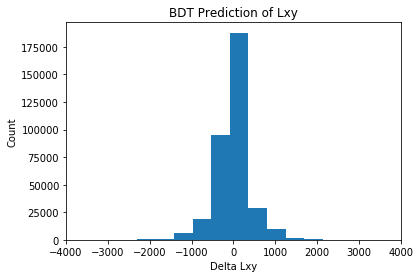

In [9]:
#histogram of BDT
delta_Lxy = prediction_BDT - Lxy_even
plt.hist(delta_Lxy, bins = 300)
plt.xlim(-4000, 4000)
plt.xlabel('Delta Lxy')
plt.ylabel('Count')
plt.title('BDT Prediction of Lxy')

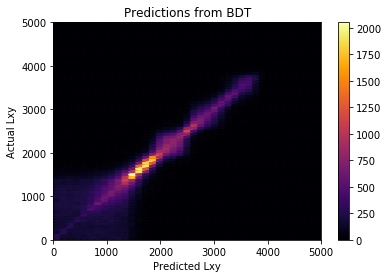

In [92]:
#hexbin plot of BDT
plt.hexbin(x=prediction_BDT, y=yeven, gridsize=(700,700), cmap='inferno')
plt.xlim(0, 5000)
plt.ylim(0, 5000)
plt.title('Predictions from BDT')
plt.xlabel('Predicted Lxy')
plt.ylabel('Actual Lxy')
plt.colorbar()
plt.show()

I'm following the same train and test process I used for the BDT when creating the Neural Network. I trained on the odds and predicted using the evens. Our data had 22 columns (n-tuples - 2 = 20) and adding the extra column for the y's I took the mean and got 11 connecting nuerons. 

In [11]:
#Neural Network
NN = MLPRegressor(hidden_layer_sizes=(20, 11))
NN.fit(Xodd, yodd)

prediction_NN = NN.predict(Xeven)

C:\Users\Jeffrey\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'NN Prediction of Lxy')

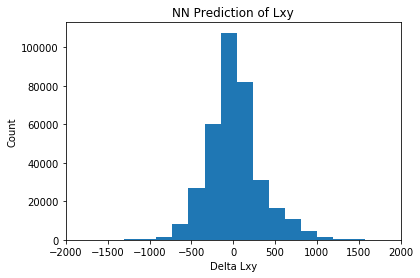

In [65]:
#histogram of NN
delta_Lxy_NN = prediction_NN - Lxy_even
plt.hist(delta_Lxy_NN, bins=250)
plt.xlim(-2000,2000)
plt.xlabel('Delta Lxy')
plt.ylabel('Count')
plt.title('NN Prediction of Lxy')

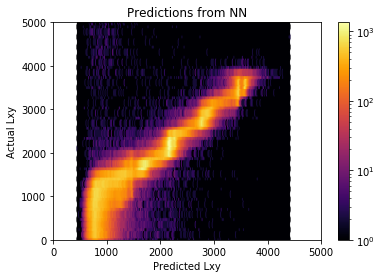

In [91]:
#hexbin plot of NN using matplotlib
plt.hexbin(x=prediction_NN, y=yeven, bins='log', gridsize=(200,200), cmap='inferno')
plt.xlim(0, 5000)
plt.ylim(0, 5000)
plt.title('Predictions from NN')
plt.xlabel('Predicted Lxy')
plt.ylabel('Actual Lxy')
plt.colorbar()
plt.show()

It seems that the Boosted Decision Tree works better than the Neural Network. In terms of speed, the BDT is much faster loading all 700,000 events where as the Nueral Network takes a lot of time to plot all the events. The code for both techniques are pretty similar so I would choose to use the BDT over the NN when testing a significant amount of events.

In [45]:
#creating dataframe with IsLLP false values, 500,000 rows
trees_wo_LLP = all_trees.loc[all_trees['IsLLP'] == False]

trees_wo_LLP2 = trees_wo_LLP.iloc[0:500000, :]

Running my regression on the IsLLP = False jets only I see that my BDT always predicts 0 which is correct.

In [97]:
#false df to test regression
false_evens = trees_wo_LLP2.iloc[::2]
false_odds = trees_wo_LLP2.iloc[1::2]

#false odds
X_f_odds = false_odds.iloc[:, 0:21]

Lx_f_odd = false_odds['Lx']
Ly_f_odd = false_odds['Ly']

Lxy_f_odd = (Lx_f_odd*Lx_f_odd + Ly_f_odd*Ly_f_odd)**0.5
y_f_odd = Lxy_f_odd

In [98]:
#BDT for false df
BDT_false = tree.DecisionTreeRegressor()
BDT_false.fit(X_f_odds, y_f_odd)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [99]:
#false evens
X_f_even = false_evens.iloc[:, 0:21]

Lx_f_even = false_evens['Lx']
Ly_f_even = false_evens['Ly']

Lxy_f_even = (Lx_f_even*Lx_f_even + Ly_f_even*Ly_f_even)**0.5
y_f_even = Lxy_f_even
f_prediction_BDT = BDT_false.predict(X_f_even)

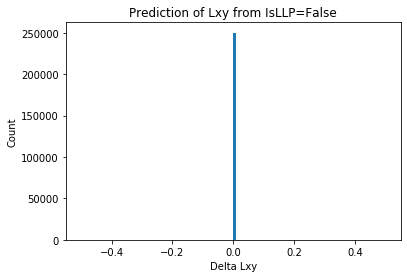

In [110]:
delta_Lxy = f_prediction_BDT - y_f_even
plt.hist(delta_Lxy, bins = 100)
plt.xlabel('Delta Lxy')
plt.ylabel('Count')
plt.title('Prediction of Lxy from IsLLP=False')
plt.show()

For the next cells I collected rows where IsLLP is false and by using the pandas concat function I added these rows to the last dataframe where IsLLP was true.

In [104]:
#add false df to the true df and create new x and y test and train values
trees_wo_LLP2=trees_wo_LLP2.reset_index(drop=True)
true_false_tree = pd.concat([trees_w_LLP, trees_wo_LLP2], axis=0)

evens = true_false_tree.iloc[::2]
odds = true_false_tree.iloc[1::2]

#true/false odds
X_tf_odd = odds.iloc[:, 0:21]

Lx_tf_odd = odds['Lx']
Ly_tf_odd = odds['Ly']

Lxy_tf_odd = (Lx_tf_odd*Lx_tf_odd + Ly_tf_odd*Ly_tf_odd)**0.5
y_tf_odd = Lxy_tf_odd

In [105]:
BDT2 = tree.DecisionTreeRegressor()
BDT2.fit(X_tf_odd, y_tf_odd)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [106]:
#true/false evens
X_tf_even = evens.iloc[:, 0:21]

Lx_tf_even = evens['Lx']
Ly_tf_even = evens['Ly']

Lxy_tf_even = (Lx_tf_even*Lx_tf_even + Ly_tf_even*Ly_tf_even)**0.5
y_tf_even = Lxy_tf_even
tf_prediction_BDT = BDT2.predict(X_tf_even)

Text(0.5, 1.0, 'IsLLP = True&False')

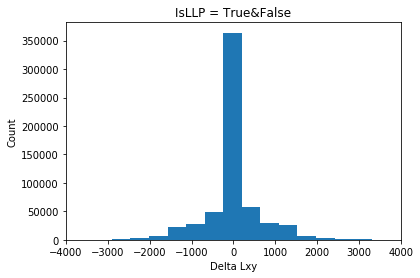

In [107]:
#histogram of BDT true and false
delta_Lxy = tf_prediction_BDT - Lxy_tf_even
plt.hist(delta_Lxy, bins = 300)
plt.xlim(-4000, 4000)
plt.xlabel('Delta Lxy')
plt.ylabel('Count')
plt.title('IsLLP = True&False')

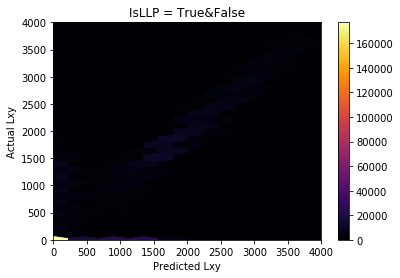

In [111]:
#hexbin of IsLLP=True&False
plt.hexbin(x=tf_prediction_BDT, y=y_tf_even, gridsize=(200,200), cmap='inferno')
plt.xlim(0, 4000)
plt.ylim(0, 4000)
plt.title('IsLLP = True&False')
plt.xlabel('Predicted Lxy')
plt.ylabel('Actual Lxy')
plt.colorbar()
plt.show()